In [66]:
# http://ailaby.com/logistic_reg/
# python sklearn でロジスティック回帰。fit して predict、引数 C で正則化

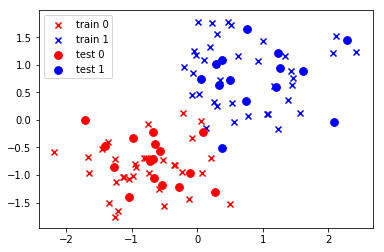

In [59]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
 
# 乱数の固定化
np.random.seed(seed=0)

# (2,2)を中心に、第二引数分分散したデータを50個作る
X_0 = np.random.multivariate_normal( [2,2],  [[2,0],[0,2]],  50 )
y_0 = np.zeros(len(X_0))

# (6,7)を中心に、第二引数分分散したデータを50個作る
X_1 = np.random.multivariate_normal( [6,7],  [[3,0],[0,3]],  50 )
y_1 = np.ones(len(X_1))

# 行列を縦に連結
X = np.vstack((X_0, X_1))
y = np.append(y_0, y_1)

# 訓練データとテストデータを3:7に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 特徴データを標準化(平均 0、標準偏差 1)
# 標準化について: https://bellcurve.jp/statistics/course/7801.html
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# X[Y==0] は、ndarrayに対する、Yの条件を満たすXの要素を計算する式
# 例:
# A = np.array([1,2,3])
# a = np.array([0,0,1])
# print(A[a==0]) # => [1,2]

# X[Y==0, 0] は、上記の結果に対する行列のアクセスも含むやつ
# 例:
# B = np.array([[1, 100], [2, 200], [3, 300]])
# b = np.array([0,0,1])
# print(B[b==0,1]) # => [100, 200]

plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')

plt.legend(loc='upper left')

In [60]:
from sklearn.linear_model import LogisticRegression
 
# 訓練
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
# テストデータ 30個を分類
print (lr.predict(X_test_std))
#-------------------------------------------------------------------------
# [ 0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.  1.  1.  1.  0.  1.  1.
#   1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
#-------------------------------------------------------------------------
 
# 精度を確認
print (lr.score(X_test_std, y_test))
#----------------
# 0.966666666667
#----------------

[ 0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.  1.  1.  1.  0.  1.  1.
  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
0.966666666667


[ 0.13310259]
[[ 1.82092295  2.26785197]]


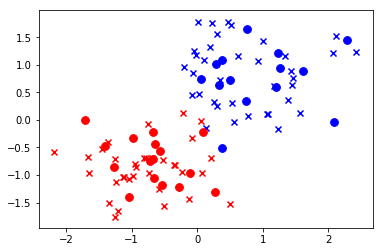

In [65]:
print (lr.intercept_)
#-----------------------------
# [ 0.13310259]
#-----------------------------
 
print (lr.coef_)
#-----------------------------
# [[ 1.82092295  2.26785197]]
#-----------------------------
 
w_0 = lr.intercept_[0]
w_1 = lr.coef_[0,0]
w_2 = lr.coef_[0,1]
 
# 
# 境界線の式
#   w_1・x + w_2・y + w_0 = 0
#   ⇒ y = (-w_1・x - w_0) / w_2
 
# 境界線 プロット
# plt.plot([-2,2], map(lambda x: (-w_1 * x - w_0)/w_2, [-2,2]))
# => 動かん...

# データを重ねる
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')